## <u>ASSIGNMENT 02: COMP7116001 - COMPUTER VISION 2022</u>

<table>
    <tr>
        <th style="text-align:left;">Name</th>
        <td style="text-align:left;">Cindy Amanda Onggirawan</td>
        <th style="text-align:left;">Lecturer</th>
        <td style="text-align:left;">Dr. Ir. Diaz D. Santika, M.Sc.</td>
    </tr>
    <tr>
        <th style="text-align:left;">NIM</th>
        <td style="text-align:left;">2440055351</td>
        <th style="text-align:left;">Lecturer Code</th>
        <td style="text-align:left;">D1159</td>
    </tr>
    <tr>
        <th style="text-align:left;">Class</th>
        <td style="text-align:left;" colspan="3">LA01</td>
    </tr>
</table>

Disini, kita menggunakan CV2 untuk membaca gambar, Numpy untuk membuat array yang semua elemennya bernilai 0, serta Matplotlib untuk memperlihatkan gambar.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Pertama-tama, kita perlu membaca gambar dengan fungsi OpenCV, yaitu cv2.imread(). Dalam fungsi ini, kita perlu mengimpor nama file gambar kita dan parameter 0 menunjukkan bahwa kita akan membaca gambar dalam grayscale. Kita menyimpan gambar dalam spatial domain ke variabel f.

In [2]:
f = cv2.imread('./image.png', 0)

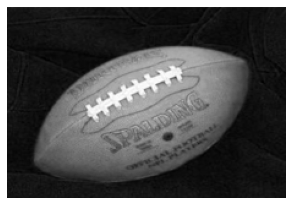

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

Selanjutnya, kita transformasikan gambar f dari spatial domain ke frequency domain dengan bantuan fungsi Numpy, yaitu np.fft.fft2(). Kita menyimpan gambar dalam frequency domain ke variabel F.

In [4]:
F = np.fft.fft2(f)

Karena kita mau menampilkan gambar dalam power spectrum, kita perlu menghitung nilai absolut dari F, kemudian mengambil log dari nilai ini dengan bantuan fungsi Numpy. Gambar ini memberi tahu bahwa low frequency terletak pada keempat sudut gambar dan high frequency terletak di pusat gambar.

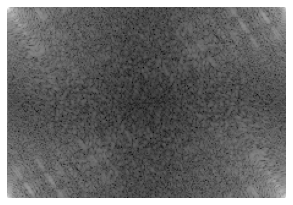

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

Kita menggeser low frequency ke pusat dengan bantuan fungsi Numpy, yaitu np.fft.fftshift().

In [6]:
Fshift = np.fft.fftshift(F)

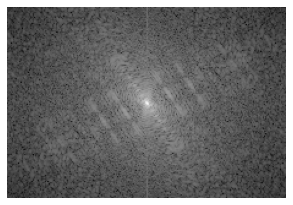

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

## 1. Gaussian Low Pass Filter

Lalu, kita menerapkan Low Pass Filter yang melewatkan low frequency di sekitar pusat gambar dan memblokir high frequency. Semakin kecil nilai D0, maka semakin kecil radius filter H, begitupun sebaliknya.

In [8]:
M, N = f.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
        H[u,v] = np.exp(- D ** 2 / (2 * D0 * D0))

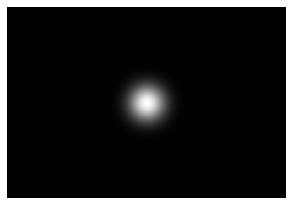

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

Selanjutnya, kita memfilter gambar dengan mengalikan gambar Fshift dalam frequency domain dengan low pass filter buatan kita.

In [10]:
Gshift = Fshift * H

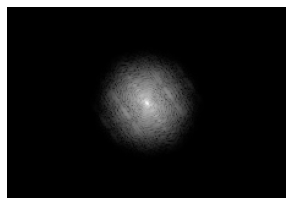

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

Kita perlu mengingat bahwa sebelumnya, kita telah menggeser low frequency ke pusat gambar. Jadi, kita geser kembali image Gshift, sebagai tindakan inverse/terbalik, dengan bantuan fungsi Numpy, yaitu np.fft.ifftshift(). Harapannya, low frequency akan kembali ke sudut-sudut gambar G.

In [12]:
G = np.fft.ifftshift(Gshift)

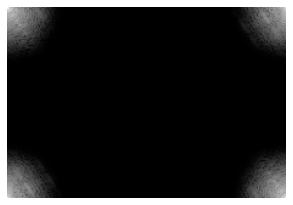

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

Akhirnya, kita mengubah gambar G dalam frequency domain kembali ke wujud asalnya, yaitu g dalam spatial domain, dengan bantuan fungsi Numpy, yaitu np.fft.ifft2() dan menghitung nilai absolutnya.

In [14]:
g = np.abs(np.fft.ifft2(G))

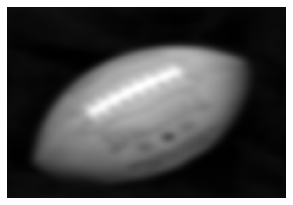

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

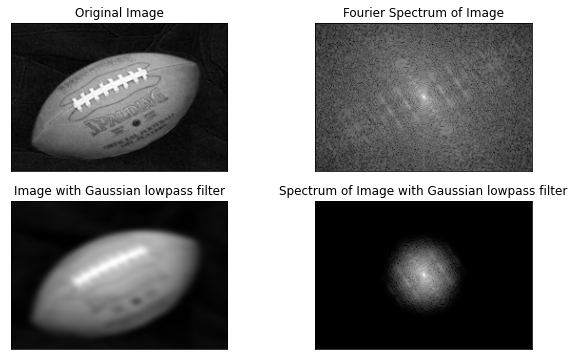

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1), plt.imshow(f, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.title('Fourier Spectrum of Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(g, cmap='gray')
plt.title('Image with Gaussian lowpass filter')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.title('Spectrum of Image with Gaussian lowpass filter')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.show()

## 2. Gaussian High Pass Filter

Jika low pass filter melewatkan low frequency di sekitar pusat gambar dan memblokir high frequency, maka sebaliknya, high pass filter memblokir low frequency di sekitar pusat gambar dan melewatkan high frequency. Oleh karena itu rumusnya adalah 1 dikurang low pass filter. Harapannya, daerah yang putih akan berwarna hitam karena 1 - 1 = 0 dan daerah yang hitam akan berwarna putih karena 1 - 0 = 1.

In [17]:
HPF = 1 - H

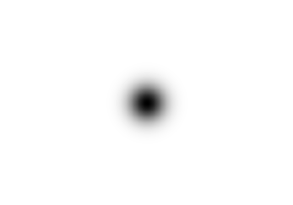

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

Selanjutnya, kita memfilter gambar dengan mengalikan gambar Fshift dalam frequency domain dengan high pass filter yang telah kita peroleh dalam perhitungan sebelumnya.

In [19]:
Gshift = Fshift * HPF

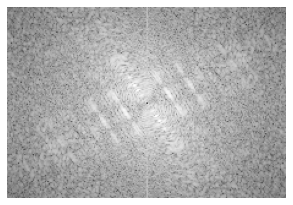

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

Kita perlu mengingat bahwa sebelumnya, kita telah menggeser low frequency ke pusat gambar. Jadi, kita geser kembali image Gshift, sebagai tindakan inverse/terbalik, dengan bantuan fungsi Numpy, yaitu np.fft.ifftshift(). Harapannya, low frequency akan kembali ke sudut-sudut gambar G.

In [21]:
G = np.fft.ifftshift(Gshift)

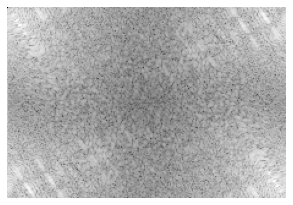

In [22]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

Akhirnya, kita mengubah gambar G dalam frequency domain kembali ke wujud asalnya, yaitu g dalam spatial domain, dengan bantuan fungsi Numpy, yaitu np.fft.ifft2() dan menghitung nilai absolutnya.

In [23]:
g = np.abs(np.fft.ifft2(G))

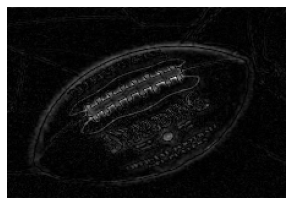

In [24]:
plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

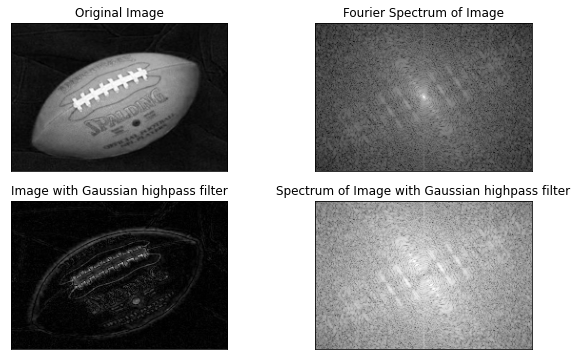

In [25]:
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1), plt.imshow(f, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.title('Fourier Spectrum of Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(g, cmap='gray')
plt.title('Image with Gaussian highpass filter')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.title('Spectrum of Image with Gaussian highpass filter')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.show()

## 3. Butterworth Notch Filter

Sama seperti sebelumnya, kita perlu membaca gambar dengan fungsi OpenCV, yaitu cv2.imread(). Dalam fungsi ini, kita perlu mengimpor nama file gambar kita dan parameter 0 menunjukkan bahwa kita akan membaca gambar dalam grayscale. Kita menyimpan gambar dalam spatial domain ke variabel f.

In [26]:
f = cv2.imread('./noisy_image.png', 0)

Kita dapat melihat bahwa ada repetitive noise pada gambar yang harus kita hilangkan atau minimalisir.

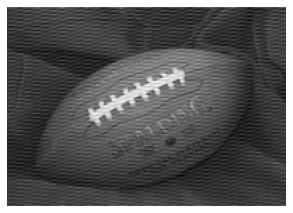

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

Selanjutnya, kita transformasikan gambar f dari spatial domain ke frequency domain dengan bantuan fungsi Numpy, yaitu np.fft.fft2(). Kita menyimpan gambar dalam frequency domain ke variabel F.

In [28]:
F = np.fft.fft2(f)

Karena kita mau menampilkan gambar dalam power spectrum, kita perlu menghitung nilai absolut dari F, kemudian mengambil log dari nilai ini dengan bantuan fungsi Numpy. Gambar ini memberi tahu bahwa low frequency tampak membentuk pola tertentu dalam gambar, menyerupai tanda tambah, dan high frequency tersebar luas diantara pola low frequency.

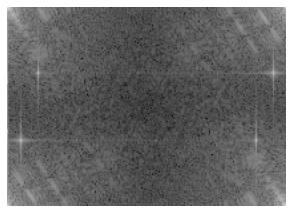

In [29]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

Kita menggeser low frequency ke pusat dengan bantuan fungsi Numpy, yaitu np.fft.fftshift().

In [30]:
Fshift = np.fft.fftshift(F)

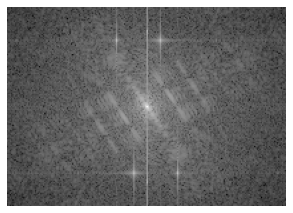

In [31]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

Kita butuh tuple shape terlebih dahulu.

In [32]:
f_shape = f.shape

Lalu, kita menerapkan Butterworth Notch Filter. Didalam fungsi ini, kita menghitung euclidean distance dari titik D(u,v) ke pusat, dengan parameter shape, D0, u_k yang akan diisi nilai untuk bergeser naik/turun dan v_k yang akan diisi nilai untuk bergeser ke kiri/kanan.

In [33]:
def notch_reject_filter(shape, D0=10, u_k=0, v_k=0):
    M, N = shape
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D_uv = np.sqrt((u - M / 2 + u_k) ** 2 + (v - N / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - M / 2 - u_k) ** 2 + (v - N / 2 - v_k) ** 2)

            if D_uv <= D0 or D_muv <= D0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0
    return H

Kita beri tanda pada repetitive noise tersebut.

In [34]:
H1 = notch_reject_filter(f_shape, 2, 50, 23)
H2 = notch_reject_filter(f_shape, 3, 50, -10)
H3 = notch_reject_filter(f_shape, 2, 58, 0)

In [35]:
BNF = H1 * H2 * H3

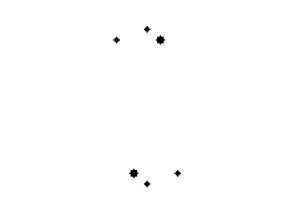

In [36]:
plt.figure(figsize=(5,5))
plt.imshow(BNF, cmap='gray')
plt.axis('off')
plt.show()

Selanjutnya, kita memfilter gambar dengan mengalikan gambar Fshift dalam frequency domain dengan butterworth notch filter buatan kita.

In [37]:
Gshift = Fshift * BNF

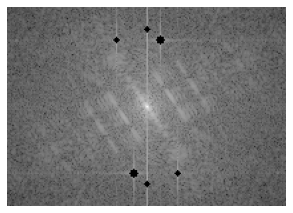

In [38]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

Kita perlu mengingat bahwa sebelumnya, kita telah menggeser low frequency ke pusat gambar. Jadi, kita geser kembali image Gshift, sebagai tindakan inverse/terbalik, dengan bantuan fungsi Numpy, yaitu np.fft.ifftshift(). Harapannya, low frequency akan kembali ke posisi awal pada gambar G.

In [39]:
G = np.fft.ifftshift(Gshift)

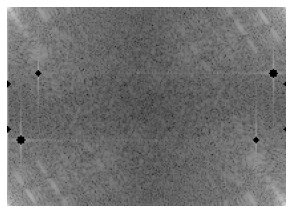

In [40]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

Akhirnya, kita mengubah gambar G dalam frequency domain kembali ke wujud asalnya, yaitu g dalam spatial domain, dengan bantuan fungsi Numpy, yaitu np.fft.ifft2() dan menghitung nilai absolutnya.

In [41]:
g = np.abs(np.fft.ifft2(G))

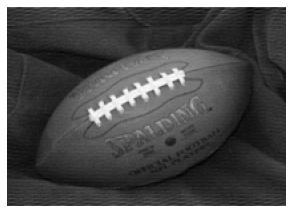

In [42]:
plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

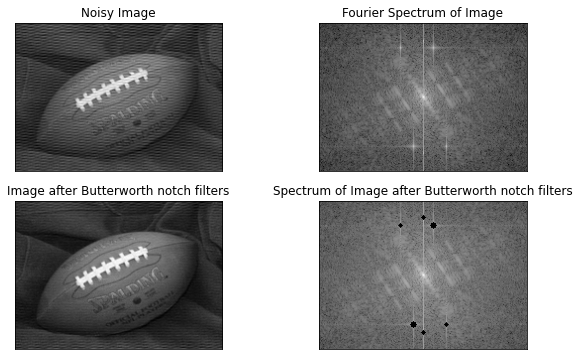

In [43]:
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1), plt.imshow(f, cmap='gray')
plt.title('Noisy Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.title('Fourier Spectrum of Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(g, cmap='gray')
plt.title('Image after Butterworth notch filters')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.title('Spectrum of Image after Butterworth notch filters')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.show()

## THANK YOU